In [1]:
import pandas as pd

# Read the data.csv file into a DataFrame
df = pd.read_csv('nft_collections.csv')

# Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40815 entries, 0 to 40814
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_volume   40815 non-null  float64
 1   total_sales    40815 non-null  float64
 2   total_supply   40815 non-null  float64
 3   num_owners     40815 non-null  int64  
 4   average_price  40815 non-null  float64
 5   num_reports    40815 non-null  int64  
 6   market_cap     40815 non-null  float64
 7   floor_price    40815 non-null  float64
 8   category       40815 non-null  object 
 9   qtd_traits     40815 non-null  int64  
 10  qtd_editors    40815 non-null  int64  
 11  target         40815 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.7+ MB


In [2]:
# Importar as bibliotecas necessárias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Separar features (X) e target (y) - Utilizando "category" como label conforme solicitado
X = df.drop(['category'], axis=1)
y = df['category']

# Verificar as classes e suas distribuições
print("\nDistribuição das classes na coluna 'category':")
print(y.value_counts())

# Dividir em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Valores ausentes por coluna:
total_volume     0
total_sales      0
total_supply     0
num_owners       0
average_price    0
num_reports      0
market_cap       0
floor_price      0
category         0
qtd_traits       0
qtd_editors      0
target           0
dtype: int64

Distribuição das classes na coluna 'category':
category
art                    19071
pfps                   13831
memberships             2551
gaming                  2262
photography             1404
virtual-worlds           740
music                    607
sports-collectibles      198
domain-names             151
Name: count, dtype: int64

Tamanho do conjunto de treino: (32652, 11)
Tamanho do conjunto de teste: (8163, 11)


In [4]:
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f"Features numéricas: {list(numeric_features)}")
print(f"Features categóricas: {list(categorical_features)}")

# Criar preprocessador com transformações apropriadas para features numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Aplicar preprocessamento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Para visualizar as dimensões dos dados após processamento
print(f"\nDimensões após preprocessamento - X_train: {X_train_processed.shape}")

Features numéricas: ['total_volume', 'total_sales', 'total_supply', 'num_owners', 'average_price', 'num_reports', 'market_cap', 'floor_price', 'qtd_traits', 'qtd_editors', 'target']
Features categóricas: []

Dimensões após preprocessamento - X_train: (32652, 11)


In [6]:
def evaluate_model(model, X_test, y_test, model_name):
    """Avalia o modelo com métricas de classificação"""
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{model_name} - Resultados:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Relatório de classificação detalhado
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusão com nomes das categorias
    cm = confusion_matrix(y_test, y_pred)
    
    # Obter classes únicas na ordem correta
    categories = sorted(list(set(y_test) | set(y_pred)))
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f'Matriz de Confusão - {model_name}', fontsize=16)
    plt.ylabel('Valor Real', fontsize=12)
    plt.xlabel('Valor Previsto', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

⏱️ Tempo de execução KNN: 0.07 segundos
🔍 Relatório de Classificação - KNN
                     precision    recall  f1-score   support

                art      0.999     0.998     0.999      3814
       domain-names      0.059     0.033     0.043        30
             gaming      0.444     0.580     0.503       452
        memberships      0.409     0.475     0.440       510
              music      0.290     0.164     0.209       122
               pfps      0.996     1.000     0.998      2766
        photography      0.375     0.338     0.356       281
sports-collectibles      0.222     0.050     0.082        40
     virtual-worlds      0.128     0.041     0.062       148

           accuracy                          0.882      8163
          macro avg      0.436     0.409     0.410      8163
       weighted avg      0.875     0.882     0.877      8163


KNN - Resultados:
Acurácia: 0.8822
Precisão: 0.8754
Revocação: 0.8822
F1-Score: 0.8772

Relatório de Classificação:
            

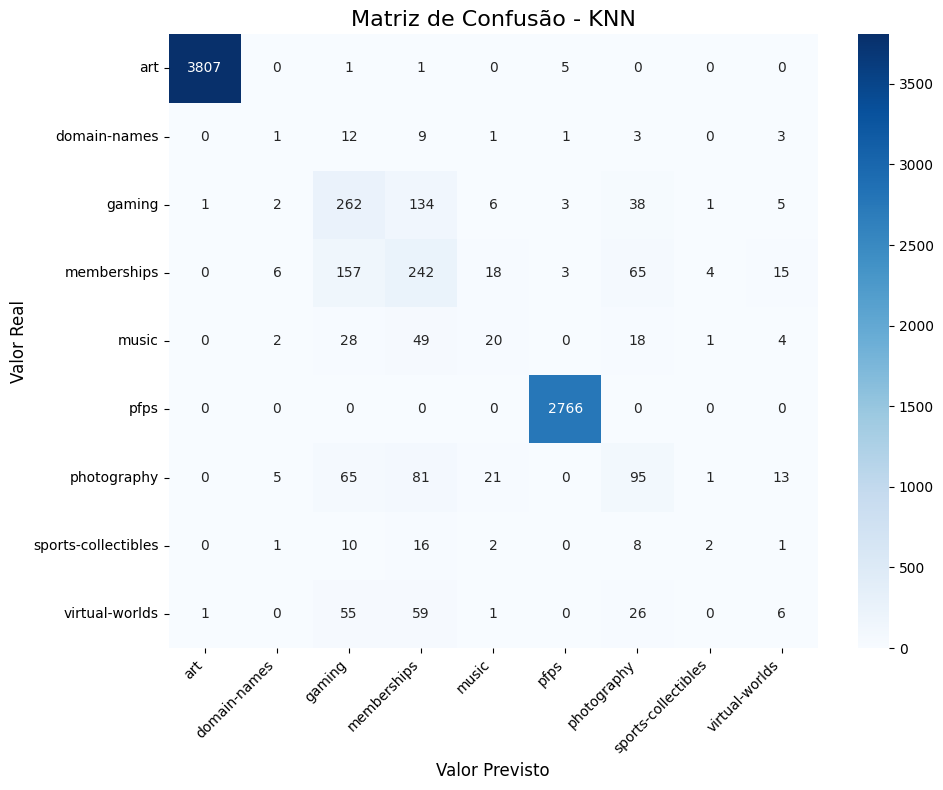

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Pipeline direto para KNN (sem GridSearchCV)
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2))  # defina os hiperparâmetros manualmente
])

# Iniciar cronômetro
start_time = time.time()

# Treinamento
knn_pipeline.fit(X_train, y_train)

# Calcular tempo de execução
knn_time = time.time() - start_time
print(f"⏱️ Tempo de execução KNN: {knn_time:.2f} segundos")

# Predição
knn_pred = knn_pipeline.predict(X_test)

# Avaliação
print("🔍 Relatório de Classificação - KNN")
print(classification_report(y_test, knn_pred, digits=3, zero_division=0))

knn_results = evaluate_model(knn_pipeline, X_test, y_test, "KNN")



Random Forest - Resultados:
Acurácia: 0.8922
Precisão: 0.8868
Revocação: 0.8922
F1-Score: 0.8880

Relatório de Classificação:
                     precision    recall  f1-score   support

                art       1.00      1.00      1.00      3814
       domain-names       0.22      0.07      0.10        30
             gaming       0.50      0.55      0.52       452
        memberships       0.46      0.55      0.50       510
              music       0.30      0.15      0.20       122
               pfps       1.00      1.00      1.00      2766
        photography       0.43      0.50      0.46       281
sports-collectibles       0.27      0.10      0.15        40
     virtual-worlds       0.17      0.07      0.10       148

           accuracy                           0.89      8163
          macro avg       0.48      0.44      0.45      8163
       weighted avg       0.89      0.89      0.89      8163



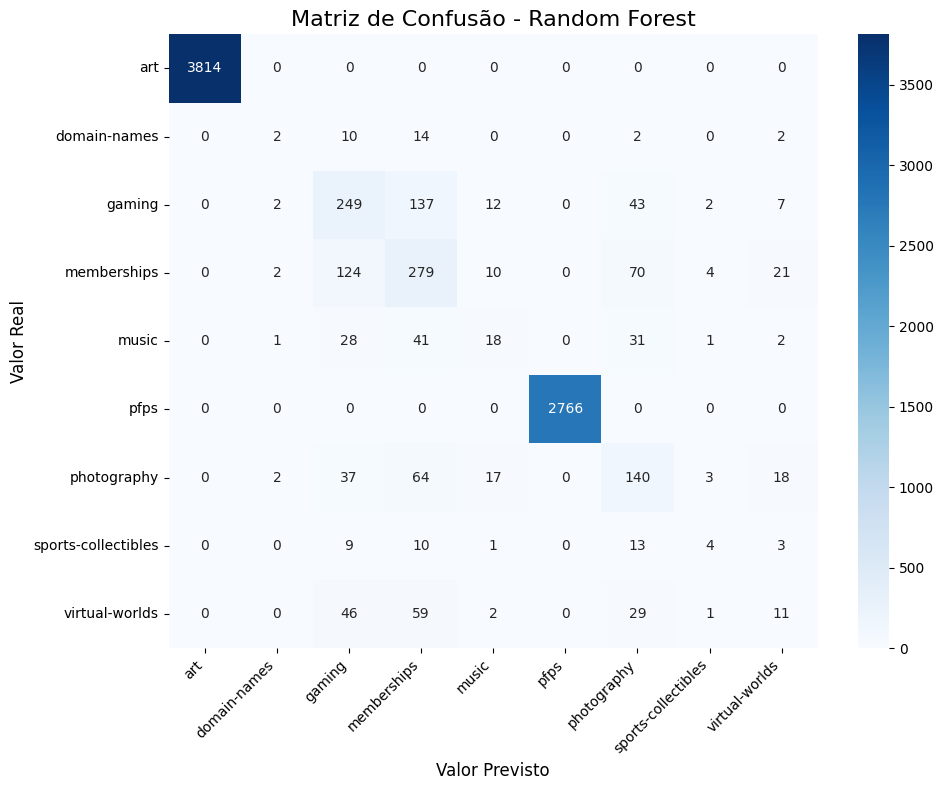

In [10]:
# Definir o pipeline para Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Iniciar cronômetro
start_time = time.time()

# Treinar o modelo
rf_pipeline.fit(X_train, y_train)

# Calcular tempo de execução
rf_time = time.time() - start_time


# Avaliar o melhor modelo Random Forest
rf_results = evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")

⏱️ Tempo de execução SVM (padrão): 2.55 segundos


d:\Emanuel\UFPI\11\Topicos\ativi6\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Emanuel\UFPI\11\Topicos\ativi6\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Emanuel\UFPI\11\Topicos\ativi6\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)


SVM (Padrão) - Resultados:
Acurácia: 0.8815
Precisão: 0.8523
Revocação: 0.8815
F1-Score: 0.8619

Relatório de Classificação:
                     precision    recall  f1-score   support

                art       1.00      1.00      1.00      3814
       domain-names       0.00      0.00      0.00        30
             gaming       0.44      0.47      0.46       452
        memberships       0.38      0.81      0.51       510
              music       0.00      0.00      0.00       122
               pfps       0.99      1.00      1.00      2766
        photography       0.00      0.00      0.00       281
sports-collectibles       0.00      0.00      0.00        40
     virtual-worlds       0.00      0.00      0.00       148

           accuracy                           0.88      8163
          macro avg       0.31      0.36      0.33      8163
       weighted avg       0.85      0.88      0.86      8163



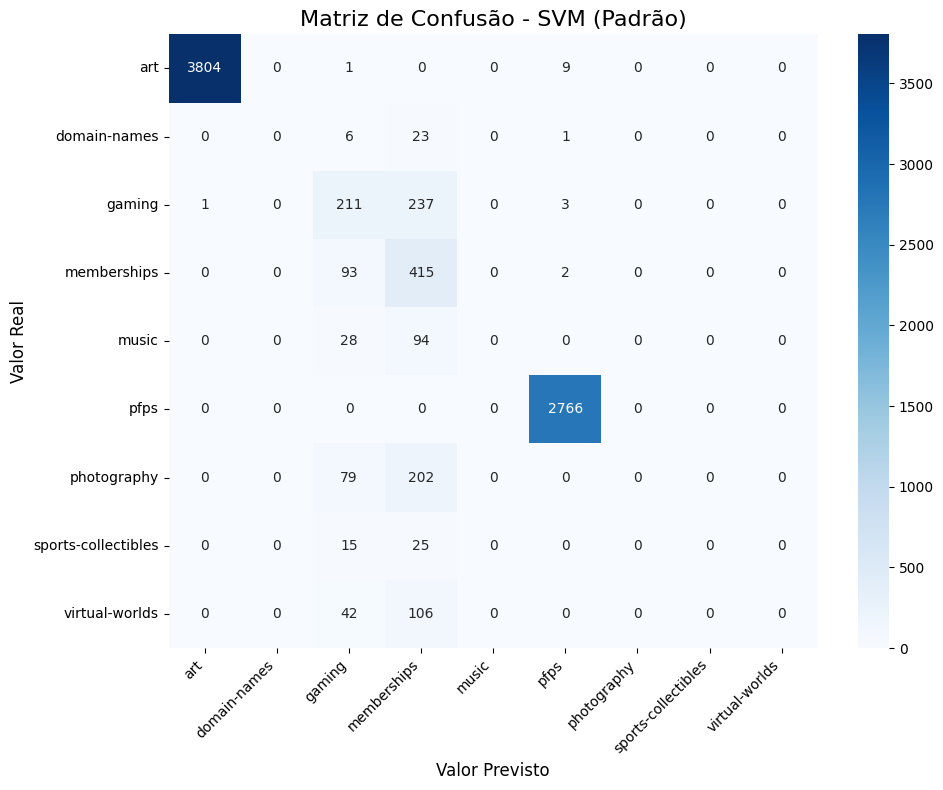

In [11]:
# Definir pipeline com SVM padrão
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # padrão: C=1.0, kernel='rbf', gamma='scale'
])

# Iniciar cronômetro
start_time = time.time()

# Treinar o modelo
svm_pipeline.fit(X_train, y_train)

# Calcular tempo de execução
svm_time = time.time() - start_time
print(f"⏱️ Tempo de execução SVM (padrão): {svm_time:.2f} segundos")

# Avaliar o modelo
svm_results = evaluate_model(svm_pipeline, X_test, y_test, "SVM (Padrão)")


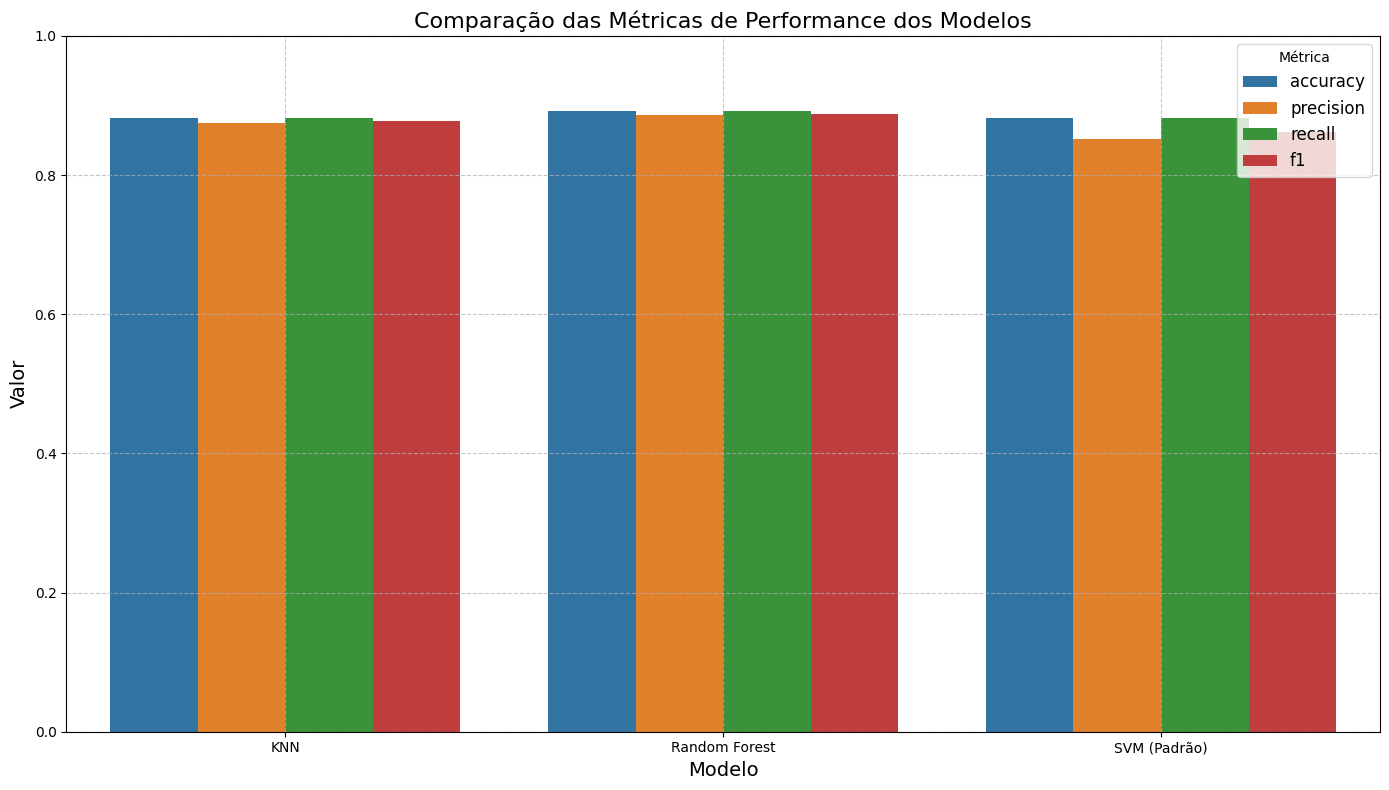


Tabela de Comparação dos Modelos:
               accuracy  precision  recall      f1
model_name                                        
KNN              0.8822     0.8754  0.8822  0.8772
Random Forest    0.8922     0.8868  0.8922  0.8880
SVM (Padrão)     0.8815     0.8523  0.8815  0.8619


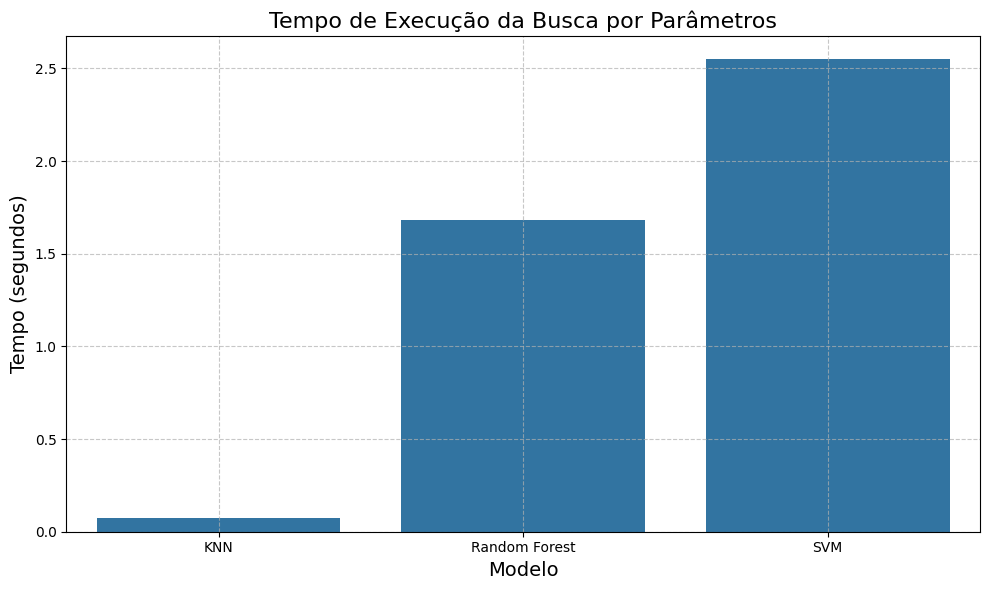

In [12]:
# Criar DataFrame com os resultados
results = [knn_results, rf_results, svm_results]
comparison_df = pd.DataFrame(results)

# Plotar gráfico de barras para comparação
metrics = ['accuracy', 'precision', 'recall', 'f1']
comparison_df_melted = pd.melt(
    comparison_df, 
    id_vars=['model_name'], 
    value_vars=metrics,
    var_name='Métrica', 
    value_name='Valor'
)

plt.figure(figsize=(14, 8))
sns.barplot(x='model_name', y='Valor', hue='Métrica', data=comparison_df_melted)
plt.title('Comparação das Métricas de Performance dos Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Métrica', fontsize=12)
plt.tight_layout()
plt.show()

# Tabela de comparação
print("\nTabela de Comparação dos Modelos:")
comparison_table = comparison_df.set_index('model_name')
print(comparison_table.round(4))

# Comparar tempos de execução
execution_times = pd.DataFrame({
    'Modelo': ['KNN', 'Random Forest', 'SVM'],
    'Tempo (segundos)': [knn_time, rf_time, svm_time]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tempo (segundos)', data=execution_times)
plt.title('Tempo de Execução da Busca por Parâmetros', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Tempo (segundos)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Descobrir a classe minoritária no conjunto de teste
unique_classes, class_counts = np.unique(y_test, return_counts=True)
min_class = unique_classes[np.argmin(class_counts)]

print(f"🟡 Classe minoritária identificada: {min_class}")

🟡 Classe minoritária identificada: domain-names


In [14]:
def get_minority_class_metrics(y_true, y_pred, target_class):
    """Extrai precisão, revocação e F1 da classe minoritária"""
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        'precision_minority': report[str(target_class)]['precision'],
        'recall_minority': report[str(target_class)]['recall'],
        'f1_minority': report[str(target_class)]['f1-score']
    }


In [15]:
# Predições
knn_pred = knn_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)

# Métricas para a classe minoritária
knn_minor_metrics = get_minority_class_metrics(y_test, knn_pred, min_class)
rf_minor_metrics = get_minority_class_metrics(y_test, rf_pred, min_class)
svm_minor_metrics = get_minority_class_metrics(y_test, svm_pred, min_class)

# Atualizar resultados
knn_results.update(knn_minor_metrics)
rf_results.update(rf_minor_metrics)
svm_results.update(svm_minor_metrics)


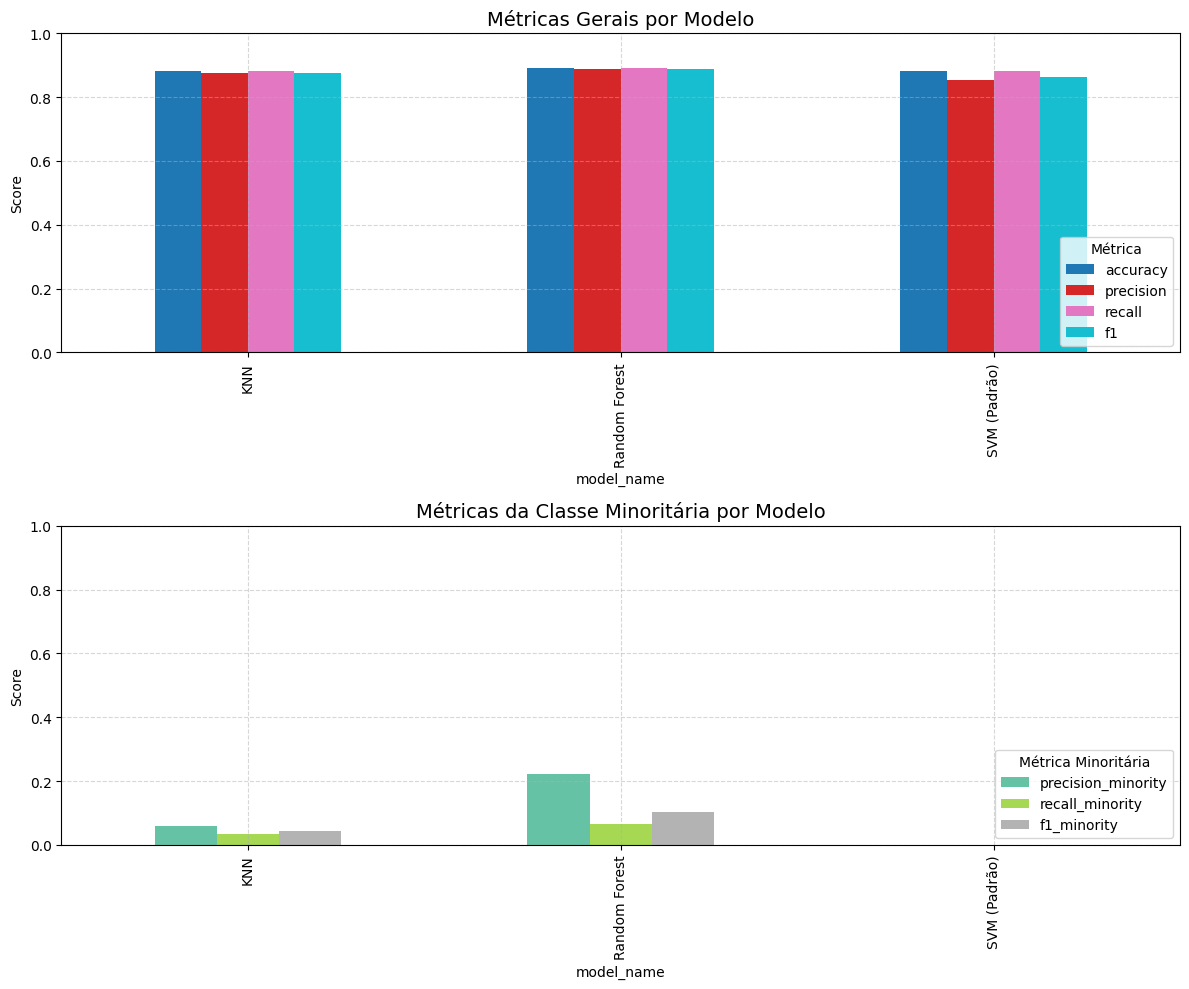

In [17]:

# Consolidar os resultados em um DataFrame
results_df = pd.DataFrame([knn_results, rf_results, svm_results])
results_df.set_index('model_name', inplace=True)

# Criar figura com dois gráficos: métricas gerais e classe minoritária
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# 1. Gráfico das métricas gerais
results_df[['accuracy', 'precision', 'recall', 'f1']].plot(
    kind='bar', ax=axs[0], colormap='tab10'
)
axs[0].set_title('Métricas Gerais por Modelo', fontsize=14)
axs[0].set_ylabel('Score')
axs[0].set_ylim(0, 1)
axs[0].legend(title='Métrica', loc='lower right')
axs[0].grid(True, linestyle='--', alpha=0.5)

# 2. Gráfico das métricas da classe minoritária
results_df[['precision_minority', 'recall_minority', 'f1_minority']].plot(
    kind='bar', ax=axs[1], colormap='Set2'
)
axs[1].set_title('Métricas da Classe Minoritária por Modelo', fontsize=14)
axs[1].set_ylabel('Score')
axs[1].set_ylim(0, 1)
axs[1].legend(title='Métrica Minoritária', loc='lower right')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
